# Newton Laws for a particle


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%%javascript
MathJax.Extension["TeX/cancel"]={version:"2.4.0",ALLOWED:{color:1,mathcolor:1,background:1,mathbackground:1,padding:1,thickness:1}};MathJax.Hub.Register.StartupHook("TeX Jax Ready",function(){var c=MathJax.InputJax.TeX,a=MathJax.ElementJax.mml,b=MathJax.Extension["TeX/cancel"];b.setAttributes=function(h,e){if(e!==""){e=e.replace(/ /g,"").split(/,/);for(var g=0,d=e.length;g<d;g++){var f=e[g].split(/[:=]/);if(b.ALLOWED[f[0]]){if(f[1]==="true"){f[1]=true}if(f[1]==="false"){f[1]=false}h[f[0]]=f[1]}}}return h};c.Definitions.Add({macros:{cancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE],bcancel:["Cancel",a.NOTATION.DOWNDIAGONALSTRIKE],xcancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.DOWNDIAGONALSTRIKE],cancelto:"CancelTo"}},null,true);c.Parse.Augment({Cancel:function(e,g){var d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:g},d);this.Push(a.menclose(f).With(h))},CancelTo:function(e,g){var i=this.ParseArg(e),d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.UPDIAGONALARROW},d);i=a.mpadded(i).With({depth:"-.1em",height:"+.1em",voffset:".1em"});this.Push(a.msup(a.menclose(f).With(h),i))}});MathJax.Hub.Startup.signal.Post("TeX cancel Ready")});MathJax.Ajax.loadComplete("[MathJax]/extensions/TeX/cancel.js");

<IPython.core.display.Javascript object>

Steps to find the motion of the particle:

1 - Draw a free body diagram of the particle. Draw all the forces being applied to thew particle.

2 - Write the expression of each force applied to the particle. For external forces (for example gravity and air friction) write the constitutive laws of the phenomena.

3 - Write the second Newton Law $\vec{\bf{F}} = m \vec{\bf{a}}$.

4 - Separate the equation into the 3 cartesian components.

5a - If possible, solve the differential equations analytically.

5b - If not possible to solve the differential equations analytically, separate each equation into 2 first order differential equations and use some numerical method (e.g. Euler, Runge-Kutta) to solve the first order differential equations with the aid of a computer. 

6 - Use the solution to interpret the situation, or to find some error on your approach.





### Example of analytical solution

A football is kicked with an angle of 30 degrees with the ground. The mass of the ball is 0.63 kg. Consider the gravitational acceleration as 9.81 m/s$^2$. The initial speed of the ball is 20 m/s and the initial height is 0 m. Find the motion of the ball. 

For this problem, $x_0 = 0$ m and $y_0 = 0$ m. As the angle of the velocity of the ball with the ground is 30 degrees, $v_{x0} = 20 \cos(30) = 20\frac{\sqrt{3}}{2} = 10\sqrt{3}$ m/s and $v_{y0} = 20 \sin(30) = 20 \frac{1}{2}$ =  10 m/s. 

The free-body diagram of the ball is depicted below:

<figure><img src="../images/ballGrav.png\" width=700 />

The only force acting on the ball is the gravitational force:

$\hat{\bf{F_g}} = - mg \hat{\bf{j}}$ 

So, we write the Second Newton Law:

$\hat{\bf{F_g}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \rightarrow - mg \hat{\bf{j}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \rightarrow - g \hat{\bf{j}} =\frac{d^2\vec{\bf{r}}}{dt^2} $

Now, we can separate the equation in two components (x and y):

$ 0 = \frac{d^2x}{dt^2} $

and

$- g = \frac{d^2y}{dt^2} $

In [5]:
m = 0.63 # [kg]
x0 = 0  #[m]
y0 = 0  #[m]
vx0 = 10*np.sqrt(3) #[m/s]
vy0 = 10 # [m/s]
g = 9.81 # [m/s^2]

These equations can be easily solved  by integrating both sides of each equation:

$ 0 = \frac{d^2x}{dt^2} \rightarrow v_{x0} = \frac{dx}{dt} \rightarrow v_{x0}t + x_{0} = x(t)$

and

$- g = \frac{d^2y}{dt^2} \rightarrow - gt + v_{y0} = \frac{dy}{dt}  \rightarrow -\frac{g}{2}t^2 +v_{y0}t + y_{0} = y(t)$


So the trajectory of the ball along time is:

$x(t) = v_{x0}t$

and 

$y(t) =  -\frac{g}{2} t^2 + v_{y0}t$

or 

$\vec{\bf{r(t)}} =  v_{x0}t \hat{\bf{i}} + (-\frac{g}{2} t^2 + v_{y0}t) \hat{\bf{j}} $

<IPython.core.display.Javascript object>


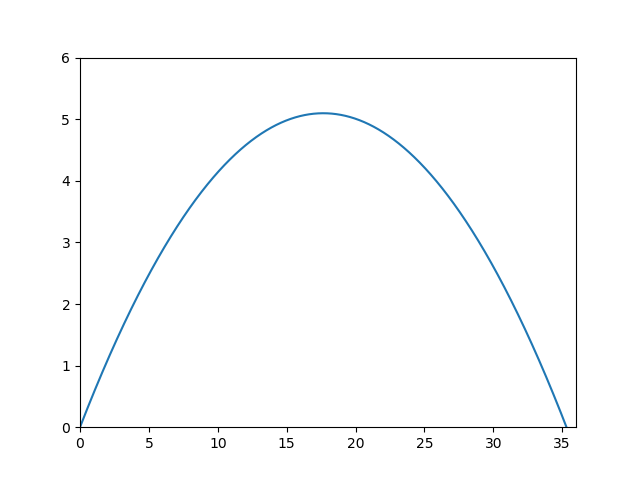

In [7]:
dt = 0.001 #[s]
%matplotlib notebook
t = np.arange(0, 2.05, dt)
plt.figure()
plt.plot(vx0*t, -g/2*t**2+vy0*t)
plt.xlim(0,36)
plt.ylim(0,6)
plt.show()


### Example of numerical solution

Although we were able to solve this example analytically, we can solve it numerically and compare both solutions.

We start from the differential equations of each coordinate, and then break them into two first-order differential equations:

$ 0 = \frac{d^2x}{dt^2} $

and

$- g = \frac{d^2y}{dt^2} $


The first equation can be broken as:

$ \frac{dv_x}{dt} = 0$

$ \frac{dx}{dt} = v_x(t)$

And the second equation can be broken as:

$\frac{dv_y}{dt} = -g$

$\frac{dy}{dt} = v_y(t)$

You can use any integration numerical method you want (Euler, Runge-Kutta, etc), bu here we will use the Euler method. Below the Euler method will be exemplified with the $x(t)$ variable:

The derivative of signal $x(t)$ is given by:

$\frac{dx}{dt} = \lim\limits_{\Delta t \rightarrow 0} \frac{x(t+\Delta t) - x(t)}{\Delta t}$

This can be approximated by: 

$\frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t} \rightarrow x(t+\Delta t) \approx x(t) + \Delta t \frac{dx}{dt}  $

So, with the initial conditions of all the variables, we can apply the equation above to find the values of the variables along time.

In [8]:
x = x0
y = y0
vx = vx0
vy = vy0
r = np.array([x,y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = 0
    vx = vx + dt * dvxdt
    dvydt = -g
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x,y])))

<IPython.core.display.Javascript object>


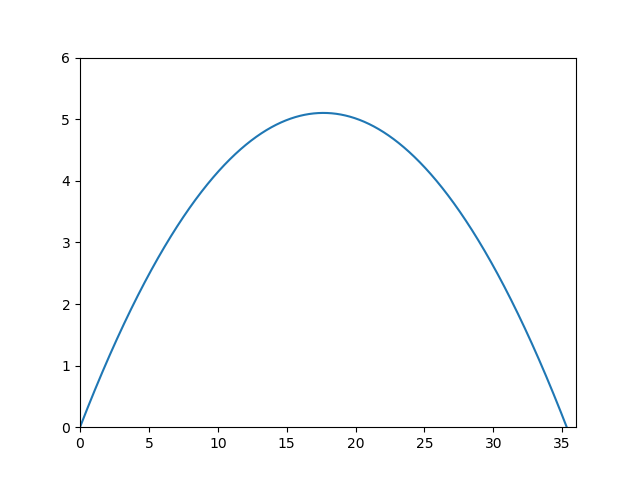

In [9]:
plt.figure()
plt.plot(r[:,0],r[:,1])
plt.xlim(0,36)
plt.ylim(0,6)
plt.show()

### An example a little bit more complex  

Now, besides the gravity, we consider the air resistance ($b$ = 0.006 Ns/m). First we will consider the air resistance  proportional to the speed and opposite direction of the velocity vector.

<figure><img src="../images/ballGravLinearRes.png\" width=700 />

So the forces being applied in the ball are:

$\vec{\bf{F}} = -mg \hat{\bf{j}} - b\vec{\bf{v}} = -mg \hat{\bf{j}} - b\frac{d\vec{\bf{r}}}{dt} = -mg \hat{\bf{j}} - b\left(\frac{dx}{dt}\hat{\bf{i}}+\frac{dy}{dt}\hat{\bf{j}}\right) = - b\frac{dx}{dt}\hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right)\hat{\bf{j}}$

Writing down the Second Newton Law:

$\vec{\bf{F}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \rightarrow - b\frac{dx}{dt}\hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right)\hat{\bf{j}} = m\left(\frac{d^2x}{dt^2}\hat{\bf{i}}+\frac{d^2y}{dt^2}\hat{\bf{j}}\right) $

Now, we can separate into one equation for each coordinate:

$- b\frac{dx}{dt} = m\frac{d^2x}{dt^2} -\rightarrow \frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt}$

$-mg - b\frac{dy}{dt} = m\frac{d^2y}{dt^2} \rightarrow \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g$

We can solve these equations analytically, for example, by using Laplace Transform or classical methods to solve linear differential equations.

The solution of linear differential equation can be found by finding the natural solution and the forced solution and then adding both solutions.

First, we solve the first differential equation ($x$ coordinate). The characteristic polynomial of the equation is:

$\lambda^2 + \frac{b}{m}\lambda = 0$

The roots of this equation are $\lambda = 0$ and $\lambda = -\frac{b}{m}$, and consequently, its natural modes are:

$x_{n_1}(t) = Ae^{0t} = A, \text{ and } x_{n_2}(t) = B e^{-\frac{b}{m}t}$ 

As there is no external forces in the $x$ direction, there is no forced solution. So, the motion of the ball in the $x$ coordinate is:

$x(t) = A + Be^{-\frac{b}{m}t}$

To find the values of the $A$ and $B$ constants, we must use the initial conditions $x(0)$ and $v_x(0)$.

$x(0) = 0 = A + B$

$v_x(0) = v_{x0} = \frac{dx(0)}{dt} = -\frac{Bb}{m}e^{-\frac{b}{m}0} \rightarrow B = -\frac{v_{x0}m}{b} \rightarrow A = \frac{v_{x0}m}{b}$

So:

$x(t) = \frac{v_{x0}m}{b} - \frac{v_{x0}m}{b}e^{-\frac{b}{m}t} = \frac{v_{x0}m}{b}\left(1-e^{-\frac{b}{m}t} \right)$


Now, we solve the differential equation for the $y$ coordinate. First, we will find the natural solution, which comprises the solution from the equation with no external forces, in this case. 

$\frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt}$

The solution of this equation is the same from the $x$ coordinate:

$y_n(t) = A + Be^{-\frac{b}{m}t}$

The forced solution, due to external forces, happens when every derivative, with the exception of the derivative with the lowest order (in this case order 1 but it could be order 0, i.e. no derivative),  goes to zero. 

$\cancelto{0}{\frac{d^2y}{dt^2}} = -\frac{b}{m}\frac{dy_f}{dt} - g -\rightarrow \frac{dy_f}{dt} = -\frac{mg}{b} \rightarrow y_f(t) =   -\frac{mg}{b}t$

The complete solution of the motion of the ball in the $y$ coordinate is the addition of the natural and forced solutions:

$y(t) = A + Be^{-\frac{b}{m}t} -\frac{mg}{b}t$

To find the values of the constants A and B, we must use the initial conditions $y(0)$ and $v_y(0)$.

$y(0) = 0 = A + B$

$v_y(0) = v_{y0} = \frac{dy(0)}{dt} = -\frac{Bb}{m} - \frac{mg}{b} \rightarrow = B =  -\frac{m^2g}{b^2} -\frac{v_{y0}m}{b} \rightarrow =A =   \frac{m^2g}{b^2} +\frac{v_{y0}m}{b} $

So, the motion of the ball in the y coordinate is:

$y(t) = \left(  \frac{m^2g}{b^2} +\frac{v_{y0}m}{b}\right) - \left(  \frac{m^2g}{b^2} +\frac{v_{y0}m}{b}\right)e^{-\frac{b}{m}t} -\frac{mg}{b}t = \left(  \frac{m^2g}{b^2} +\frac{v_{y0}m}{b}\right)\left(1 - e^{-\frac{b}{m}t}\right) -\frac{mg}{b}t$

<IPython.core.display.Javascript object>


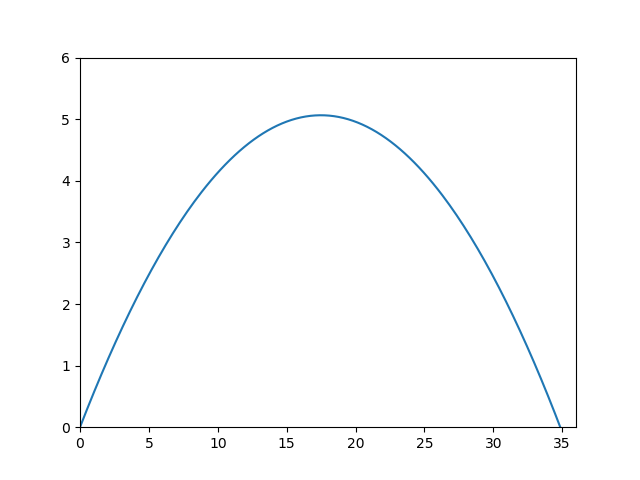

In [10]:
b = 0.006 # [Ns/m]
t = np.arange(0, 2.05, 0.01)
plt.figure()
plt.plot(vx0*m/b*(1-np.exp(-b/m*t)), 
         (vy0*m/b+g*m**2/b**2)*(1-np.exp(-b/m*t)) - g*m/b*t)
plt.xlim(0,36)
plt.ylim(0,6)
plt.show()

Now, we will solve the same situation using a numerical method (Euler method). 

We start from the equations  in each coordinate previously found:

$\frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt}$

$\frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g$

We can separate each equation into two first order equations:

$\frac{dv_x}{dt} = -\frac{b}{m} v_x$

$\frac{dx}{dt} = v_x$

$\frac{dv_y}{dt} = -\frac{b}{m}v_y - g$

$\frac{dy}{dt} = v_y$



In [8]:
x = x0
y = y0
vx = vx0
vy = vy0
r = np.array([x,y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m*vx
    vx = vx + dt * dvxdt
    dvydt = -g - b/m*vy
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x,y])))

<IPython.core.display.Javascript object>


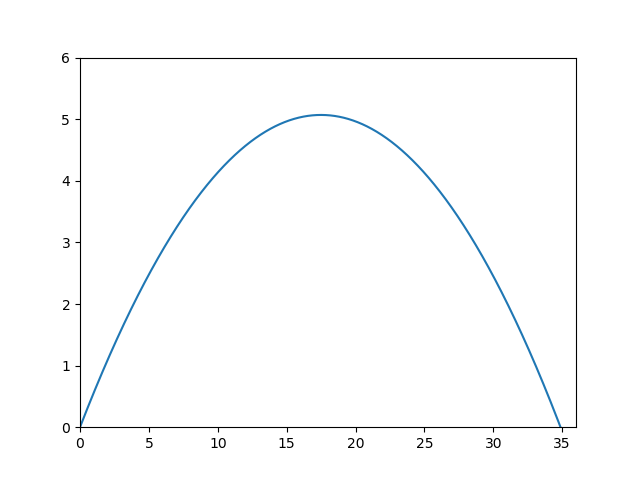

In [9]:
plt.figure()
plt.plot(r[:,0],r[:,1])
plt.xlim(0,36)
plt.ylim(0,6)
plt.show()

### A more complex example

Now, we will consider the air resistance  proportional to the square of speed and still in the opposite direction of the velocity vector. 

<figure><img src="../images/ballGravSquareRes.png\" width=700 />

So the forces being applied in the ball are:

$\vec{\bf{F}} = -mg \hat{\bf{j}} - bv^2\hat{\bf{e_t}} = -mg \hat{\bf{j}} - b (v_x^2+v_y^2) \frac{v_x\hat{\bf{i}}+v_y\hat{\bf{j}}}{\sqrt{v_x^2+v_y^2}} =   -mg \hat{\bf{j}} - b \sqrt{v_x^2+v_y^2} \,(v_x\hat{\bf{i}}+v_y\hat{\bf{j}}) =  -mg \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}}+\frac{dy}{dt}\hat{\bf{j}}\right) $

Writing down the Second Newton Law:

$\vec{\bf{F}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \rightarrow -mg \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}}+\frac{dy}{dt}\hat{\bf{j}}\right) = m\left(\frac{d^2x}{dt^2}\hat{\bf{i}}+\frac{d^2y}{dt^2}\hat{\bf{j}}\right) $

Now, we can separate into one equation for each coordinate:

$- b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} = m\frac{d^2x}{dt^2} \rightarrow \frac{d^2x}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} $

$-mg - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} = m\frac{d^2y}{dt^2} \rightarrow \frac{d^2y}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} -g $


These equations are very difficult to solve analytically, but they can be easily  solved by using numerical methods. Below we  will use the same numerical method (Euler method) to solve these equations.

To do that, we must break each equation into two first-order differential equations:

$\frac{dv_x}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_x$

$\frac{dx}{dt} = v_x$

$\frac{dv_y}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_y -g $

$\frac{dy}{dt} = v_y$

<IPython.core.display.Javascript object>


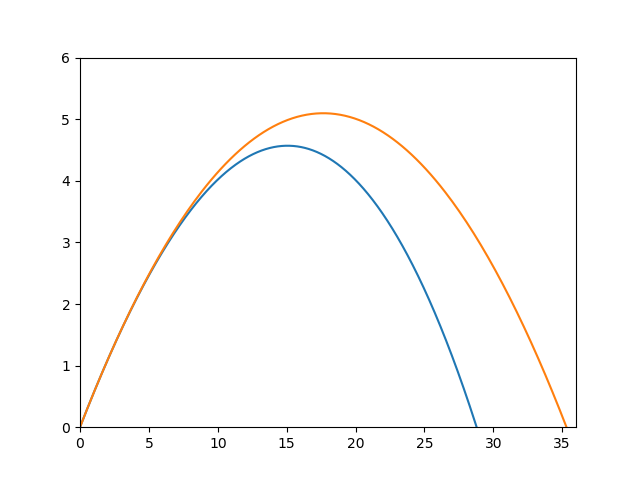

In [10]:
x = x0
y = y0
vx = vx0
vy = vy0
r = np.array([x,y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m*np.sqrt(vx**2+vy**2)*vx
    vx = vx + dt * dvxdt
    dvydt = -b/m*np.sqrt(vx**2+vy**2)*vy - g
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x,y])))

plt.figure()
plt.plot(r[:,0],r[:,1])
plt.plot(10*np.sqrt(3)*t, -4.905*t**2+10*t)
plt.xlim(0,36)
plt.ylim(0,6)
plt.show()

### Problems

Exercises 11.1.15, 11.1.16, 11.1.17, 11.1.19, 11.1.24, 11.1.29, 11.1.30, 11.1.32 from Ruina and Pratap book.